<a href="https://colab.research.google.com/github/zeel2321-lit/Stock_Price_Prediction_/blob/main/Stock_price_Prediction_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import packages
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
#for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
#to plot within notebook
import matplotlib.pyplot as plt


In [5]:

#Read the data file
df = pd.read_csv('/content/RELIANCE.NS (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-04-2017,664.699341,683.768555,662.247559,680.871033,663.438965,20715169
1,05-04-2017,691.049561,702.342468,683.570435,700.856567,682.912842,18609462
2,06-04-2017,697.884766,717.647400,694.516663,712.496277,694.254578,23361514
3,07-04-2017,703.976990,710.267395,694.690063,696.696045,678.858887,14710432
4,10-04-2017,698.380066,705.760071,682.183594,684.189575,666.672546,14199616
...,...,...,...,...,...,...,...
1232,29-03-2022,2638.000000,2638.000000,2607.399902,2622.550049,2622.550049,4007695
1233,30-03-2022,2639.899902,2688.000000,2617.100098,2672.949951,2672.949951,7297028
1234,31-03-2022,2664.949951,2669.699951,2628.600098,2634.750000,2634.750000,6102744
1235,01-04-2022,2636.000000,2665.149902,2622.000000,2655.850098,2655.850098,3656408


In [6]:
#Setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

In [7]:
#Converting dates into number of days as dates cannot be passed directly 
#to any regression model
df.index = (df.index - pd.to_datetime('03-04-2017')).days

In [8]:
#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
y = np.asarray(df['Close'])
x = np.asarray(df.index.values)

In [9]:
#Model initialization
#by default the degree of the equation is 1.
#Hence the mathematical model equation is y = mx + c, 
#which is an equation of a line.
regression_model = LinearRegression()


In [10]:
#Choose the order of your polynomial. Here the degree is set to 5.
#hence the mathematical model equation is 
#y = c0 + c1.x**1 + c2.x**2+....+ c5.x**5
poly = PolynomialFeatures(5)


In [11]:
#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(x.reshape(-1, 1))

In [12]:
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [13]:
# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(X_transform)

In [14]:
#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 1825 days ( roughly 5 yrs)
#to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 1825))

In [15]:
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

In [16]:
#Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(X_extended_transform)

In [17]:
#Print the last predicted value
print ("Closing price at 2023 would be around ", y_predict[-1])

Closing price at 2023 would be around  [-34920.70261043]


In [19]:
#Convert the days index back to dates index for plotting the graph
x = pd.to_datetime(df.index, origin='03-04-2017', unit='D')
future_x = pd.to_datetime(newindex, origin='03-04-2017', unit='D')

In [20]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

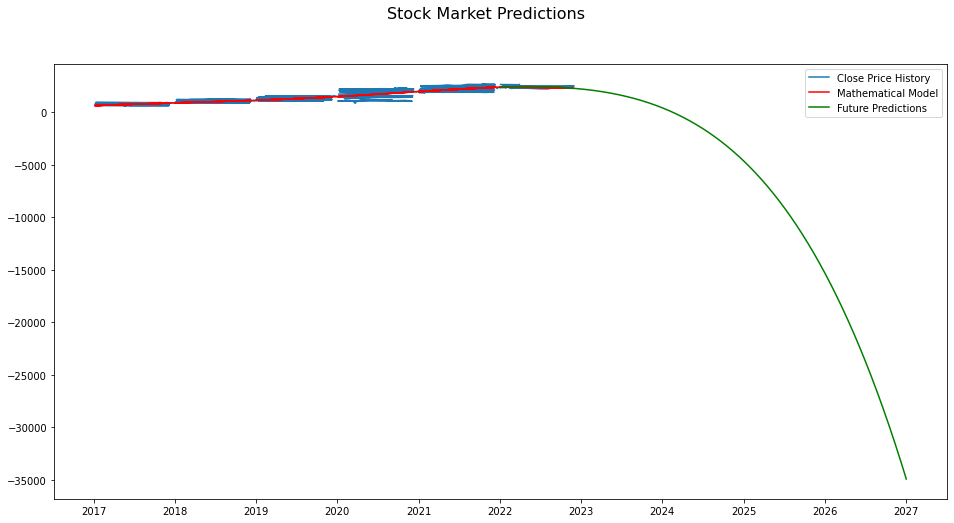

In [22]:

#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')
plt.plot(x,y_learned, color='r', label='Mathematical Model')
plt.plot(future_x,y_predict, color='g', label='Future Predictions')
plt.suptitle('Stock Market Predictions', fontsize=16)
#Set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')
#display the legends
plt.legend()
#display the graph
plt.show()


In [28]:
rms=np.sqrt(np.mean(np.power((y_predict-y),2)))
rms

12957.457097489925